## Import libs:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

## Import data:

In [2]:
df_schema = pd.read_csv(r'./developer_survey_2020/survey_results_schema.csv',sep=',')
df = pd.read_csv(r'./developer_survey_2020/survey_results_public.csv',sep=',')

# General Overview

In [3]:
df_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


The 'QuestionText' is compressing some part of the text. <br>
If you want to see the full description of each question, you can use the following resource:

In [4]:
userinput = input('Want to see the full description?\n(y/n)\n')

if userinput.lower()=='y':
    for idx,col in enumerate(df_schema.Column):
            print (col,':\n-->',df_schema.QuestionText.loc[idx],'\n')
else:
    print("Ok, let's skip this.")

Want to see the full description?
(y/n)
 y


Respondent :
--> Randomized respondent ID number (not in order of survey response time) 

MainBranch :
--> Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." 

Hobbyist :
--> Do you code as a hobby? 

Age :
--> What is your age (in years)? If you prefer not to answer, you may leave this question blank. 

Age1stCode :
--> At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project) 

CompFreq :
--> Is that compensation weekly, monthly, or yearly? 

CompTotal :
--> What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty. 

ConvertedComp :
--> Salary converted to annual USD salaries using the exchange rate 

In [5]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [6]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

- We will start analyzing the MainBranch field. <br>
Full description is : "Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." "

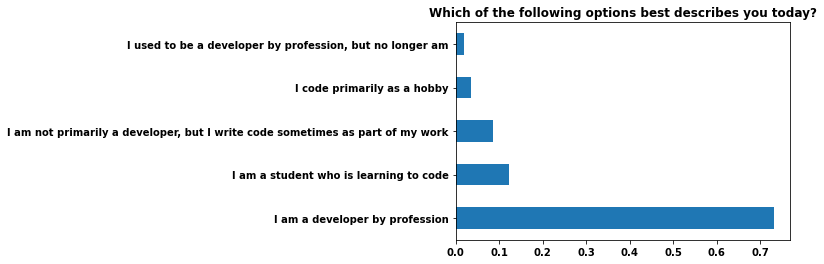

In [7]:
status_vals = df['MainBranch'].value_counts() #Provide a pandas series of the counts for each Professional status

# The below should be a horizontal bar chart of the proportion of individuals in each professional category
(status_vals/df.shape[0]).plot(kind="barh");
plt.title("Which of the following options best describes you today?");

- Now we are about to dive in Formal Education Levels

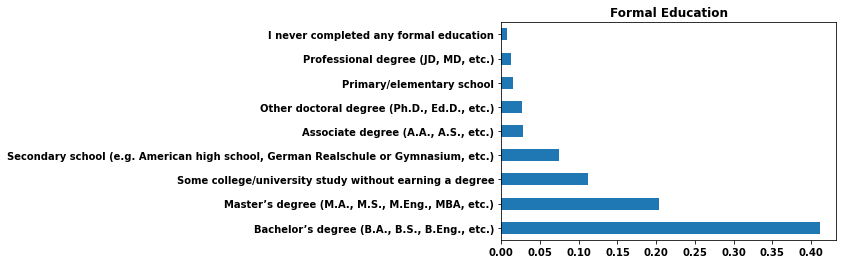

In [8]:
ed_vals = df['EdLevel'].value_counts() #Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/df.shape[0]).plot(kind="barh");
plt.title("Formal Education");

- The top 10 country (in volume of users):

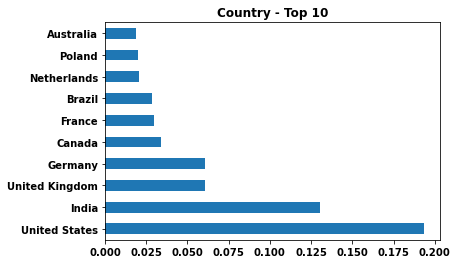

In [9]:
country_vals = df['Country'].value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries
(country_vals[:10]/df.shape[0]).plot(kind="barh");
plt.title("Country - Top 10");

# Specific questions:

This section will cover some curious things about the survey answers.

## Does it worth to complete a Master's or Doctor's Degree? (financially exclusive purpose)
In case you already have a Bachelor's Degree, should you invest your time and effort to get a higher degree in order to increase your salary? <br>
Let's find out!

In [10]:
#ConvertedComp column means "Salary converted to annual USD salaries using the
#exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."

df[['ConvertedComp', 'EdLevel', 'Employment']]

,ConvertedComp,EdLevel,Employment
0,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em..."
1,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time
2,NaN,NaN,NaN
3,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN
4,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time
...,...,...,...
64456,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time
64457,NaN,NaN,Employed full-time
64458,NaN,Primary/elementary school,NaN
64459,NaN,NaN,Employed full-time


In [11]:
#list the possible values to Education Level column
list(df.EdLevel.unique())

['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
 nan,
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
 'Professional degree (JD, MD, etc.)',
 'Some college/university study without earning a degree',
 'Associate degree (A.A., A.S., etc.)',
 'Other doctoral degree (Ph.D., Ed.D., etc.)',
 'Primary/elementary school',
 'I never completed any formal education']

In [12]:
#check the percentage of null values in ConvertedComp column
df.ConvertedComp.isna().mean().round(2)

0.46

In [13]:
degree_df = df.dropna(subset=['ConvertedComp'], how='any') #drop rows with null ConvertedComp values
degree_df = degree_df[['ConvertedComp', 'EdLevel', 'Employment']].copy()

In [14]:
#Create a list of degrees we are interest in analyze
degrees = ['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
           'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
           'Other doctoral degree (Ph.D., Ed.D., etc.)']

In [15]:
#filter the dataframe to include only the EdLevels of interest
degree_df = degree_df[degree_df['EdLevel'].isin(degrees)]

In [16]:
degree_df.groupby('EdLevel').agg(['mean','count'])\
.style.bar(subset=[('ConvertedComp','mean')], align='mid', color=['#d65f5f', '#5fba7d'])\
.set_precision(2)

- As you can see, we have some differences in the mean salary of each degree. But is it statistically significant? <br>
In the following lines we are going to work with a A/B test approach, using a very useful technique called 'bootstrapping'

In [17]:
control_mean = degree_df.query('EdLevel == "Bachelor’s degree (B.A., B.S., B.Eng., etc.)"').ConvertedComp.mean()
control_mean

107638.14531231481

In [18]:
experiment_mean = degree_df.query('EdLevel != "Bachelor’s degree (B.A., B.S., B.Eng., etc.)"').ConvertedComp.mean()
experiment_mean

105403.24362895005

In [19]:
# compute observed difference
obs_diff = experiment_mean - control_mean
# display observed difference
obs_diff

-2234.901683364762

In [27]:
size

26684

In [20]:
# create sampling distribution of difference in composition
# with boostrapping
diffs = []
size = degree_df.shape[0]
for _ in range(10000):
    b_samp = degree_df.sample(size, replace=True)
    control_mean = b_samp.query('EdLevel == "Bachelor’s degree (B.A., B.S., B.Eng., etc.)"').ConvertedComp.mean()
    experiment_mean = b_samp.query('EdLevel != "Bachelor’s degree (B.A., B.S., B.Eng., etc.)"').ConvertedComp.mean()
    diffs.append(experiment_mean - control_mean)

In [21]:
# convert to numpy array
diffs = np.array(diffs)

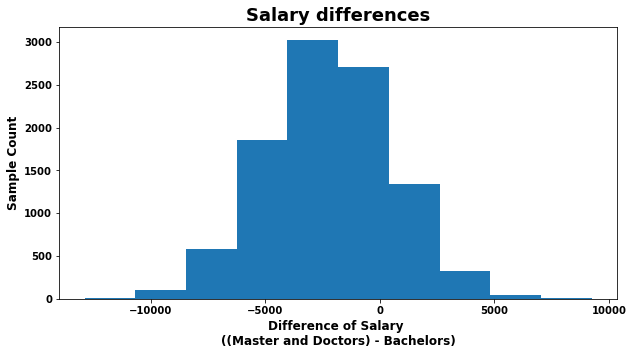

In [22]:
# plot sampling distribution
plt.figure(figsize=(10,5))
plt.hist(diffs)
plt.title('Salary differences',fontsize=18)
plt.xlabel('Difference of Salary \n((Master and Doctors) - Bachelors)',fontsize=12)
plt.ylabel('Sample Count',fontsize=12);

In [23]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

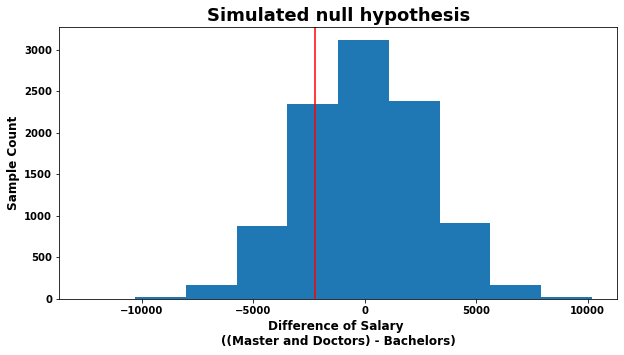

In [29]:
plt.figure(figsize=(10,5))
# plot null distribution
plt.hist(null_vals)
plt.title('Simulated null hypothesis',fontsize=18)
plt.xlabel('Difference of Salary \n((Master and Doctors) - Bachelors)',fontsize=12)
plt.ylabel('Sample Count',fontsize=12)

# plot line for observed statistic
plt.axvline(obs_diff, c='red');


In [25]:
# compute p value
(null_vals > obs_diff).mean()

0.7878

In [26]:
#Confidence interval (95%)
print(np.percentile(diffs,2.5),np.percentile(diffs,97.5))

-7621.966752080725 3144.583071944516


- Packing everything together:

Text(7000, 2000, 'p-value = 0.79')

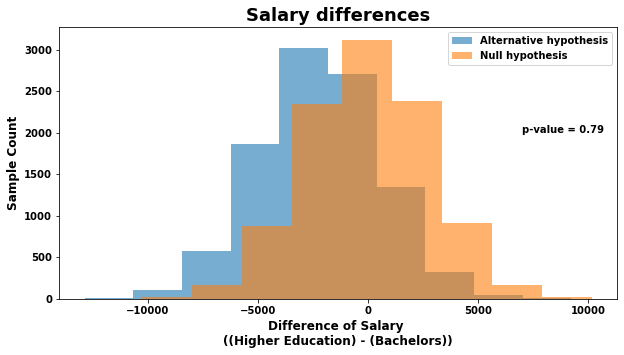

In [30]:
# plot sampling distribution
plt.figure(figsize=(10,5))
plt.hist(diffs,alpha=0.6,label='Alternative hypothesis')
plt.title('Salary differences',fontsize=18)
plt.xlabel('Difference of Salary \n((Higher Education) - (Bachelors))',fontsize=12)
plt.ylabel('Sample Count',fontsize=12);

# plot null distribution
plt.hist(null_vals,alpha=0.6,label='Null hypothesis')
plt.legend()
plt.text(7000, 2000, "p-value = 0.79")

Let's explain ours hypothesis:
- Null hypothesis: Master's and Doctor's mean salary == Bachelor's mean salary
- Alternative hypothesis: Master's and Doctor's mean salary > Bachelor's mean salary
---
Results discussion:
- This graphic represent the difference of salaries (master or doctor) - (bachelor) with bootstrapping sampling technique.
- If the higher educated would earn more money, the blue area should be at the right half of this figure.<br>
In this case, the blue area is slightly shifted to the left.<br> However, it doesn't mean we can affirm that higher education have a SIGNIFICANT lower salary.
- Since the p-value is 0.79, we can't reject the null hypothesis (equal salary).
<br><br>

We can conclude that there is no sufficient arguments to ensure that the higher educated receive better salaries than bachelors. <br><br>

Education has a lot of benefits, it's good for you, for your company and for the society. I don't intend to discourage anyone of doing it. <br>
But if you are a bachelor aiming to receive more money, based on the data of this survey, I can recommend you to look for other strategies than getting higher degrees.<br>
It will be more efficient ;)

## Got Stuck in a problem?
See what to do to get out of it:

Survey's question: What do you do when you get stuck on a problem? Select all that apply.

In [31]:
method_list = df.NEWStuck.value_counts().reset_index().rename(columns={'index':'method'})['method'][:10]

In [32]:
method_list

0                                 Visit Stack Overflow
1    Visit Stack Overflow;Watch help / tutorial videos
2    Call a coworker or friend;Visit Stack Overflow...
3    Call a coworker or friend;Visit Stack Overflow...
4       Call a coworker or friend;Visit Stack Overflow
5    Call a coworker or friend;Visit Stack Overflow...
6    Call a coworker or friend;Visit Stack Overflow...
7    Visit Stack Overflow;Watch help / tutorial vid...
8    Call a coworker or friend;Visit Stack Overflow...
9    Visit Stack Overflow;Go for a walk or other ph...
Name: method, dtype: object

As you can see, this data it's not organized in a friendly way to analyze. Let's prepare better this data.

In [33]:
#For each response, separate all the given answers in a list format
mylist=set()
for word in method_list:
    print(word.split(';'))
    result=word.split(';')
    for i in result:
        mylist.add(i)


['Visit Stack Overflow']
['Visit Stack Overflow', 'Watch help / tutorial videos']
['Call a coworker or friend', 'Visit Stack Overflow', 'Watch help / tutorial videos']
['Call a coworker or friend', 'Visit Stack Overflow', 'Do other work and come back later']
['Call a coworker or friend', 'Visit Stack Overflow']
['Call a coworker or friend', 'Visit Stack Overflow', 'Go for a walk or other physical activity', 'Watch help / tutorial videos', 'Do other work and come back later']
['Call a coworker or friend', 'Visit Stack Overflow', 'Watch help / tutorial videos', 'Do other work and come back later']
['Visit Stack Overflow', 'Watch help / tutorial videos', 'Do other work and come back later']
['Call a coworker or friend', 'Visit Stack Overflow', 'Go for a walk or other physical activity', 'Do other work and come back later']
['Visit Stack Overflow', 'Go for a walk or other physical activity', 'Do other work and come back later']


In [34]:
mylist

{'Call a coworker or friend',
 'Do other work and come back later',
 'Go for a walk or other physical activity',
 'Visit Stack Overflow',
 'Watch help / tutorial videos'}

In this question, the respondents had multiple options to select, and it's stored in a unique column, multiple strings delimited with semicolons. <br>
Check this out:

In [35]:
df.NEWStuck.value_counts()

Visit Stack Overflow                                                                                                                                          2904
Visit Stack Overflow;Watch help / tutorial videos                                                                                                             2862
Call a coworker or friend;Visit Stack Overflow;Watch help / tutorial videos                                                                                   2833
Call a coworker or friend;Visit Stack Overflow;Do other work and come back later                                                                              2343
Call a coworker or friend;Visit Stack Overflow                                                                                                                2205
                                                                                                                                                              ... 
Meditate;Play games;Vi

- If we plot the data without any cleaning we would get a dirty graph like that:

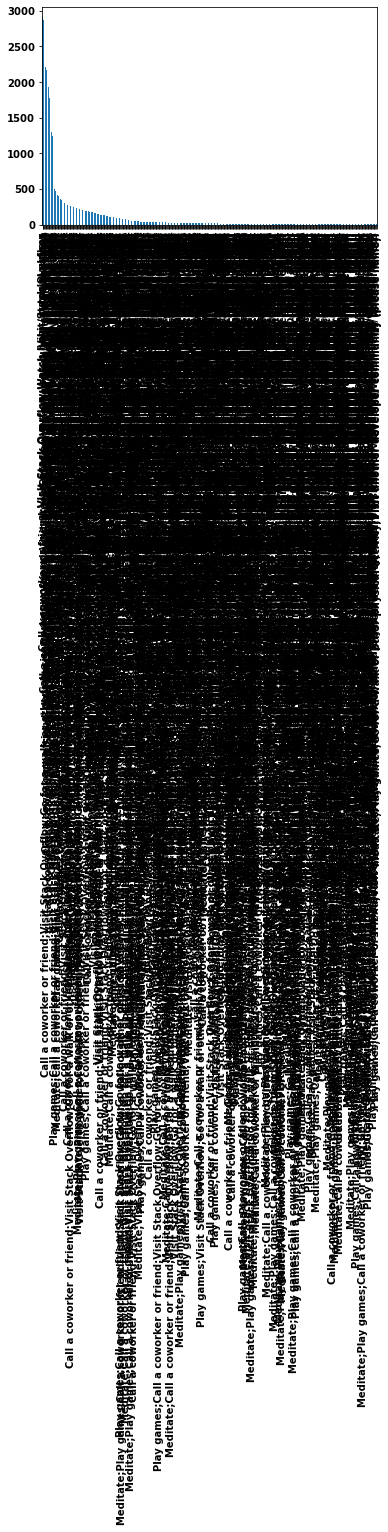

In [36]:
df.NEWStuck.value_counts().plot(kind='bar');

- In order to create a cleaner visualization, we need to process the data:

In [37]:
#Print a list with all raw answers (with semicolons)
method_list = df.NEWStuck.value_counts().reset_index().rename(columns={'index':'method'})['method']
method_list

0                                   Visit Stack Overflow
1      Visit Stack Overflow;Watch help / tutorial videos
2      Call a coworker or friend;Visit Stack Overflow...
3      Call a coworker or friend;Visit Stack Overflow...
4         Call a coworker or friend;Visit Stack Overflow
                             ...                        
439    Meditate;Play games;Visit Stack Overflow;Go fo...
440    Play games;Call a coworker or friend;Panic;Wat...
441    Meditate;Play games;Call a coworker or friend;...
442    Play games;Call a coworker or friend;Visit Sta...
443    Meditate;Play games;Go for a walk or other phy...
Name: method, Length: 444, dtype: object

In [38]:
#Create a new list('mylist'),rearranging the results to keep only the unique options
mylist=set()
for word in method_list:
    result=word.split(';')
    for i in result:
        mylist.add(i)

In [39]:
mylist

{'Call a coworker or friend',
 'Do other work and come back later',
 'Go for a walk or other physical activity',
 'Meditate',
 'Panic',
 'Play games',
 'Visit Stack Overflow',
 'Visit another developer community (please name):',
 'Watch help / tutorial videos'}

- Above is the list with every avaiable option

- The function defined below receive a dataframe and look through a column counting values based on a list of avaiable options.

In [40]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of methos
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed methos is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
                
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [41]:
possible_vals = mylist.copy()

def clean_and_plot(df, title='How to unstuck', plot=True):
    '''
    INPUT 
        df - a dataframe holding the NEWStuck column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of unstucking methods
        Displays a plot of pretty things related to the NEWStuck column.
    '''
    study = df['NEWStuck'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'NEWStuck': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title)
        plt.ylabel('% of answers')
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df

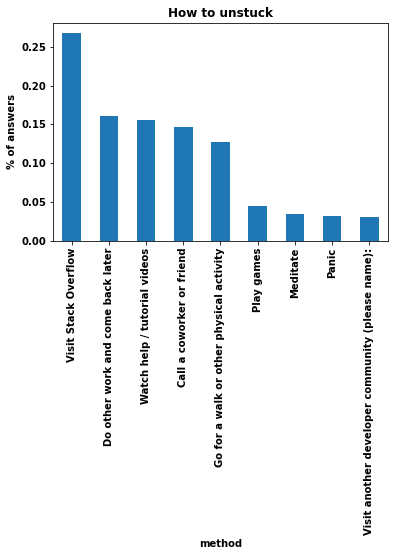

In [42]:
general_unstuck = clean_and_plot(df)

 - The best recommendation is to visit StackOverflow , followed by 'doing other work and coming back later', 'watch help/tutorial videos' and 'call a coworker or friend'.

 In my personal experience, I think meditation is a very good technique to code better. <br>
 In the following lines, we are going to explore better this option and check if meditation is good to the developers community.

# MEDITATION

Meditation is a proven technique to improve memory and focus, increase imagination and creativity, reduce stress and anxiety and much more benefits. <br>
It looks like a good habit to a developer incorporate to his daily basis.<br>
Meditation can really help to solve problems. <br>
The question is: Is the developers community aware of the meditation benefits to their work? <br><br>

We are going to examine how respondents react when they get stuck on a problem (comparing those who meditate and those who don't)

## Method to unstuck

In [43]:
#remove any row where NEWStuck is empty
df_unstuck = df.dropna(subset=['NEWStuck'], how='any')

In [44]:
#Create dataframe for meditants
df_meditation = df_unstuck[df_unstuck.NEWStuck.str.contains('Meditate')]

#Create dataframe for not meditants
df_no_meditation = df_unstuck[~df_unstuck.NEWStuck.str.contains('Meditate')]

In [45]:
#Counting values using the clean_and_plot function
meditation_count = clean_and_plot(df_meditation,plot=False)
no_meditation_count = clean_and_plot(df_no_meditation,plot=False)

In [46]:
#display raw results
meditation_count, no_meditation_count

(                                                     count
 method                                                    
 Meditate                                          0.209574
 Visit Stack Overflow                              0.184549
 Do other work and come back later                 0.132090
 Go for a walk or other physical activity          0.128348
 Watch help / tutorial videos                      0.121709
 Call a coworker or friend                         0.107781
 Play games                                        0.051840
 Panic                                             0.037326
 Visit another developer community (please name):  0.026783,
                                                      count
 method                                                    
 Visit Stack Overflow                              0.283665
 Do other work and come back later                 0.166180
 Watch help / tutorial videos                      0.162427
 Call a coworker or friend             

In [47]:
#join the 2 dataframes
joined_df = meditation_count.merge(no_meditation_count,on='method',how='inner')

In [48]:
#rename columns
joined_df = joined_df.rename(columns={'count_x':'MEDITANTS','count_y':'NOT MEDITANTS'})

#Show the differences in proportions
joined_df['differences'] = joined_df['MEDITANTS'] - joined_df['NOT MEDITANTS']
joined_df.sort_values('differences',inplace=True)

In [49]:
joined_df

,MEDITANTS,NOT MEDITANTS,differences
method,,,
Visit Stack Overflow,0.184549,0.283665,-0.099116
Call a coworker or friend,0.107781,0.154990,-0.047209
Watch help / tutorial videos,0.121709,0.162427,-0.040717
Do other work and come back later,0.132090,0.166180,-0.034090
Visit another developer community (please name):,0.026783,0.030962,-0.004179
Go for a walk or other physical activity,0.128348,0.127627,0.000721
Panic,0.037326,0.031264,0.006062
Play games,0.051840,0.042885,0.008955


In [50]:
#Filter only the most expressive differences to visualizate later
joined_df2 = joined_df.loc[joined_df[0:4].index]


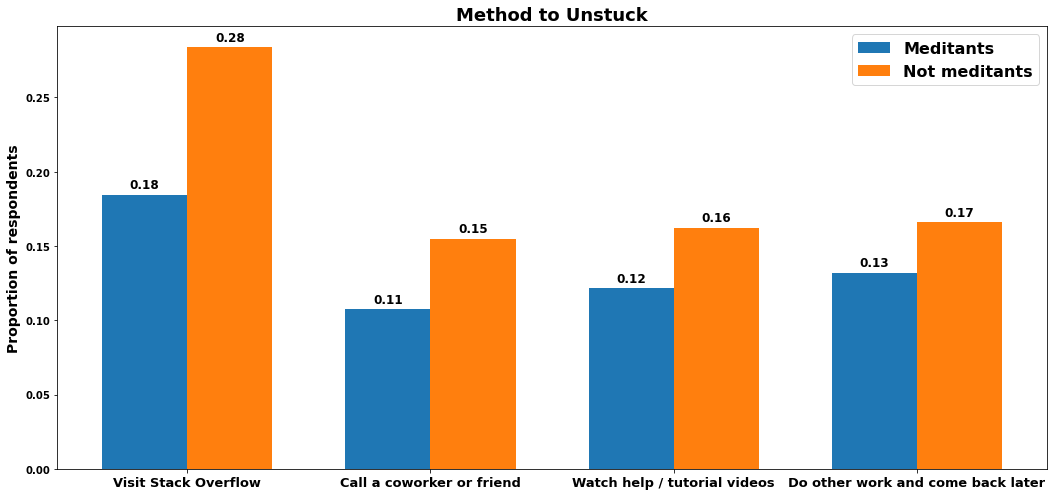

In [51]:
labels = joined_df2.index #define the labels
meditant_values = joined_df2['MEDITANTS'].values #get proportions of meditants
notmeditant_values = joined_df2['NOT MEDITANTS'].values #get proportions of not meditants


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


plt.rcParams['figure.figsize'] = [15, 7]
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, meditant_values, width, label='Meditants')
rects2 = ax.bar(x + width/2, notmeditant_values, width, label='Not meditants')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of respondents',fontsize=14)
ax.set_title('Method to Unstuck',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=13)
ax.legend(fontsize=16)

ax.bar_label(rects1, padding=3,fmt='%.2f',fontsize=12)
ax.bar_label(rects2, padding=3,fmt='%.2f',fontsize=12)

fig.tight_layout()

plt.show()

- Cool! We can see that meditants depends less on external resources! Interesting fact!
- Meditation is a good way to avoid StackOverflow, call other people or spend time watching more videos ;)

## Job Satisfaction

Now we are going to analyze the job satisfaction:

In [52]:
#subset of previous dataframe
df_no = df_no_meditation[['Respondent','ConvertedComp','JobSat']].dropna().copy()

In [53]:
#subset of previous dataframe
df_yes = df_meditation[['Respondent','ConvertedComp','JobSat']].dropna().copy()

In [54]:
#Mask to organize index
satisfaction_mask = ["Very dissatisfied", "Slightly dissatisfied",
                     "Neither satisfied nor dissatisfied","Slightly satisfied",
                     "Very satisfied"]

In [55]:
#Proportion of each job satisfaction for not meditants
df_no.groupby('JobSat')['Respondent'].count().reindex(satisfaction_mask)/df_no.shape[0]

JobSat
Very dissatisfied                     0.080197
Slightly dissatisfied                 0.166221
Neither satisfied nor dissatisfied    0.115087
Slightly satisfied                    0.311125
Very satisfied                        0.327370
Name: Respondent, dtype: float64

In [56]:
#df_no.groupby('JobSat')['ConvertedComp'].mean().reindex(satisfaction_mask).plot(kind='barh')

In [57]:
#Proportion of each job satisfaction for meditants
df_yes.groupby('JobSat')['Respondent'].count().reindex(satisfaction_mask)/df_yes.shape[0]

JobSat
Very dissatisfied                     0.082788
Slightly dissatisfied                 0.165051
Neither satisfied nor dissatisfied    0.121037
Slightly satisfied                    0.307571
Very satisfied                        0.323553
Name: Respondent, dtype: float64

In [58]:
#df_yes.groupby('JobSat')['ConvertedComp'].mean().reindex(satisfaction_mask).plot(kind='barh')

Let's see the results together:

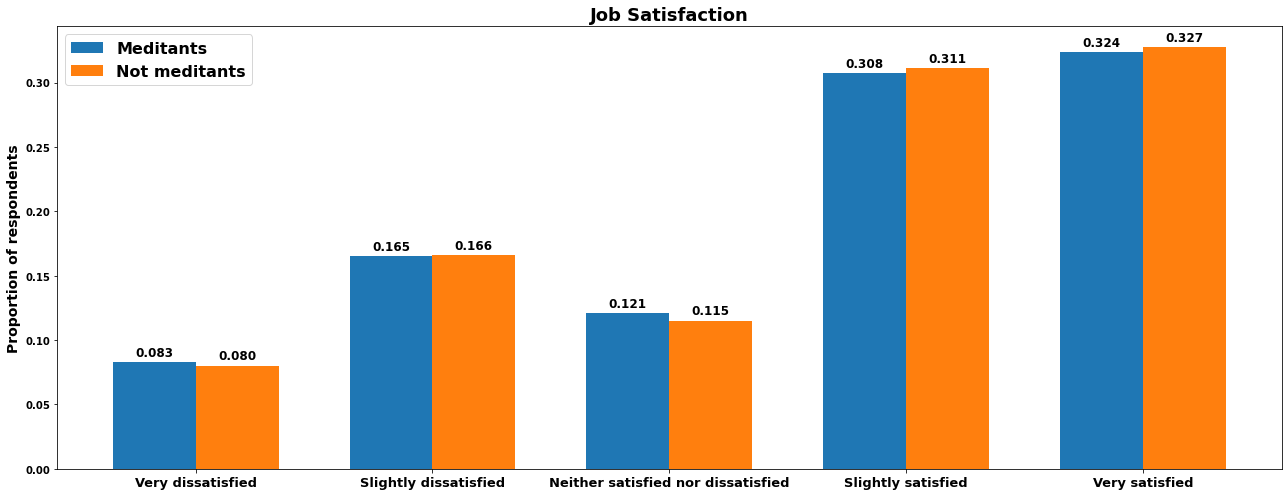

In [59]:
labels = satisfaction_mask
meditant_values = (df_yes.groupby('JobSat')['Respondent'].count().reindex(satisfaction_mask)/df_yes.shape[0]).values
notmeditant_values = (df_no.groupby('JobSat')['Respondent'].count().reindex(satisfaction_mask)/df_no.shape[0]).values
                     

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


plt.rcParams['figure.figsize'] = [18, 7]
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, meditant_values, width, label='Meditants')
rects2 = ax.bar(x + width/2, notmeditant_values, width, label='Not meditants')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of respondents',fontsize=14)
ax.set_title('Job Satisfaction',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=13)
ax.legend(fontsize=16)

ax.bar_label(rects1, padding=3,fmt='%.3f',fontsize=12)
ax.bar_label(rects2, padding=3,fmt='%.3f',fontsize=12)

fig.tight_layout()

plt.show()

- As we can see, there is no expressive difference here.
- Meditation doesn't look like a relevant feature for job satisfaction based on the data of this survey. <br>It suggests that there are other features to evaluate job satisfaction (and it's a very complicated subject, isn't it?)<br>

It doensn't mean meditation has no value.  This technique can really change many areas of your life, don't give up of meditation ; )

# Conclusion

In this article/notebook we have explored the 2020 Stack Overflow survey results data. <br>
We prepared the data to analyze some aleatory things:<br>
- We found out that master's and doctor's degree will not improve your salary directly.<br> So if you focus on money, you should try others strategies to increase salary.
- We learned from others developers the most popular solutions to get rid of stucking problems.
- We discussed the impacts of meditation as a 'unstucking technique' and as a feature for Job Satisfaction.

I hope you have enjoyed our findings, and also have learned some code tips to prepare, analyze and visualizate data.

In case you want to dive deeper on this dataframe, you can get it from:<br>
https://insights.stackoverflow.com/survey <br>

Thanks for your time, see you!

You can access the notebook here:<br>
https://github.com/b-prado/udacity_project_1

In case you want to keep contact, add my Linkedin profile ;)<br>
https://www.linkedin.com/in/bruno-prado-42b87ab2/